## Линейная регрессия

Регрессия - это восстановление зависимости между $Y$ и $X$ (называют отклик и регрессор соответственно). 

В терминах статистики мы имеем выборку $\mathbf X^n$ и выборку $\mathbf Y^n$, причём $Y_i$ зависит от $X_i$ и только от него. Тогда регрессия -это попытка оценить функцию $r(x) = \mathbb E(Y|X = x)$ в условиях того, что распределение $Y$ неизвестно как функцию от зафиксированного $X$.

Так как истинное распределение $Y$ при зафиксированном $X$ неизвестно, для решения задачи регрессии предполагают некоторую модель. Чаще всего, эта модель имеет вид

$Y_i = r(X_i) + \epsilon_i$,

где $\epsilon_i$ - некоторая случайная величина, называемая шумом. Тогда, если $\mathbb E\epsilon_i = 0$, очевидно, что функция $r$ согласуется с определением, так как 

$r(X_i) = \mathbb E(Y|X = X_i) = \mathbb E(r(X_i) + \epsilon_i) = r(X_i)$.

Линейная регрессия - это подбор функции $r(x)$ в виде линейной функции: $r(x) = \beta_0 + \beta_1 x$.

Для подбора функции используют разные методы, например требуют, чтобы отклонение функции от реальных значений было минимально.

1: 1 3
2: 2 4
3: 3 5

r(x) = x + 1.5
y3 = r(x_3)

### Метод наименьших квадратов

Назовём предсказанием оценку $Y_i$ с помощью найденной функции $r$:

$\hat{Y_i} = r(X_i)$,

а остатоком - величину отклонения от реального значения:

$\hat{\epsilon_i} = \hat{Y_i} - Y_i.$

##### Определение
Функция $\hat{r}(X_i) = \hat{\beta_0} + \hat{\beta_1}X_i$ называется оценкой линейной регрессии методом наименьших квадратов, если среди всех линейных функций величина

$RSS = \sum_{i=1}^n \hat{\epsilon_i}^2$

для функции $\hat{r}$ минимальна.

Таким образом, оценка регрессии методом наименьших квадратов - это подбор такой функции, которая минимизирует отклонение между реальными данными и предсказанными значениями.

##### Синтетический пример

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
N = 30

X = np.linspace(0, 10, N)
epsilon = sts.norm().rvs(N)

def r(X):
    return 1 + 0.5 * X

Y = r(X) + epsilon

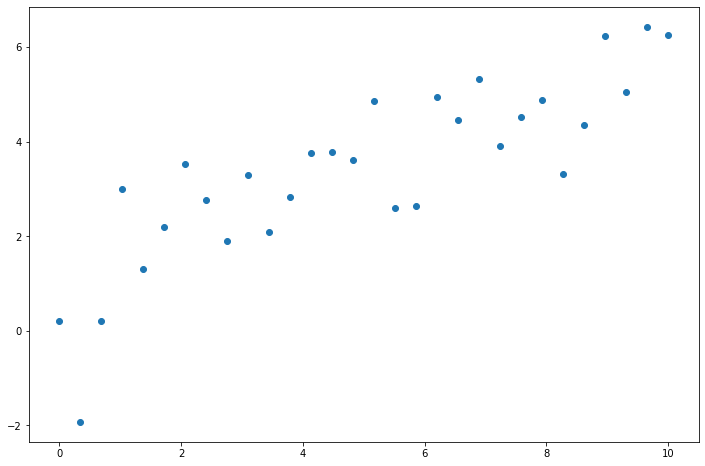

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X, Y)

In [ ]:
def r_hat(X, b0, b1):
    return b0 + b1 * X

In [ ]:
# найдём r перебором
min_rss = float("inf")
b0_best = 0
b1_best = 0

for b0 in np.linspace(-2, 0, 1000):
    for b1 in np.linspace(0, 2, 1000):
        rss = np.sum((Y - r_hat(X, b0, b1))**2)
        if rss < min_rss:
            min_rss = rss
            b0_best = b0
            b1_best = b1

In [ ]:
x_visual = np.linspace(0, 10, 1000)
r_real = r(x_visual)
r_estimated = r_hat(x_visual, b0_best, b1_best)

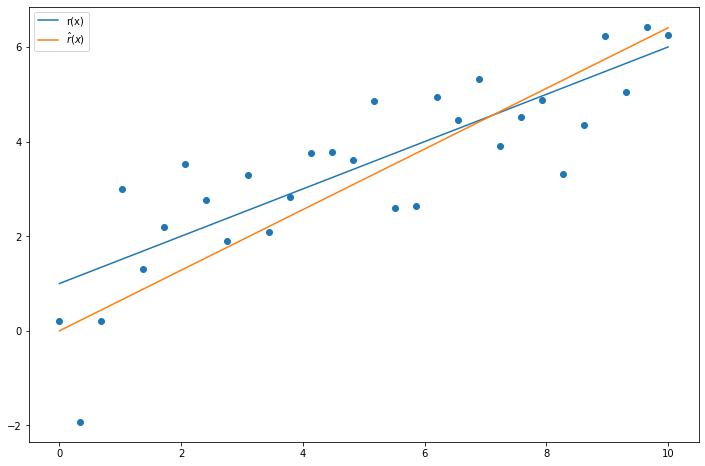

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(X, Y)

plt.plot(x_visual, r_real, label='r(x)')
plt.plot(x_visual, r_estimated, label=r'$\hat{r}(x)$')
plt.legend()

##### Аналитическое решение

На самом деле, для оценки методом наименьших квадратов есть аналитическое решение.

$\textit{Упражнение}$. Показать, что RSS минимизируется при 

$\hat{\beta_1} = \frac{\sum_{i=1}^n(X_i - \overline{\mathbf X^n})(Y_i - \overline{\mathbf Y^n})}{\sum_{i=1}^n(X_i - \overline{\mathbf X^n})^2}$

$\hat{\beta_0} = \overline{\mathbf Y^n} - \beta_1\overline{\mathbf X^n}$.

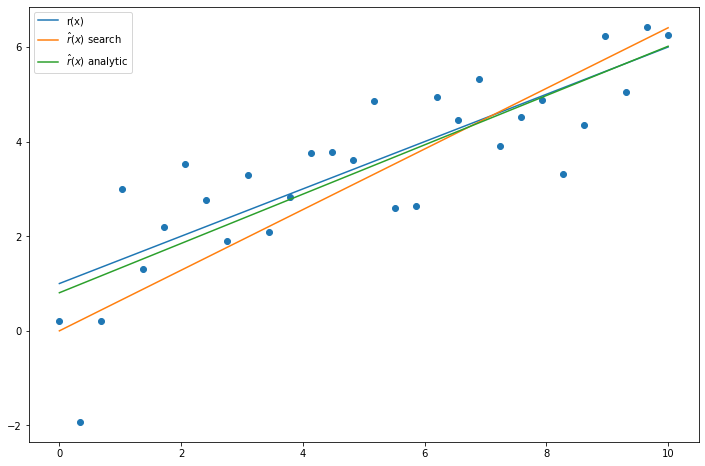

In [ ]:
# построим аналитическое решение и сравним с реальным и с подбором

mean_x = np.mean(X)
mean_y = np.mean(Y)

beta_1 = np.sum((X - mean_x)*(Y - mean_y)) / np.sum((X - mean_x)**2)
beta_0 = mean_y - beta_1 * mean_x

x_visual = np.linspace(0, 10, 1000)
r_real = r(x_visual)
r_estimated = r_hat(x_visual, b0_best, b1_best)
r_analytic = r_hat(x_visual, beta_0, beta_1)

plt.figure(figsize=(12, 8))
plt.scatter(X, Y)

plt.plot(x_visual, r_real, label='r(x)')
plt.plot(x_visual, r_estimated, label=r'$\hat{r}(x)$ search')
plt.plot(x_visual, r_analytic, label=r'$\hat{r}(x)$ analytic')
plt.legend()

### Оценка $\hat{r}$ методом максимального правдоподобия

Для оценки методом максимизации правдоподобия нам необходимо предположить распределение $Y_i$. Пусть $\mathbf X^n$ фиксирована, а $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$, где $\epsilon_i \sim \mathcal N(0, \sigma^2)$.

Тогда, $z_i := Y_i - \beta_0 - \beta_1 X_i \sim \mathcal N(0, \sigma^2)$.

Напоминание: плотность нормального распределения

$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$.

$\textit{Упражнение}$. Показать, что в условиях приведённой модели ОМП совпадает с оценкой методом наименьших квадратов.

$\textit{Упражнение}$ Покажите, что стандартное отклонение оценок $\hat{\beta_0}$, $\hat{\beta_1}$ равно

$\hat{se}_0 = \frac{\sigma}{s_X\sqrt{n}}\sqrt{\frac{\sum_{i=1}^nX_i^2}{n}}$,

$\hat{se}_1 = \frac{\sigma}{s_X\sqrt{n}}$,

где $s_X^2 = \frac{1}{n}\sum_{i=1}^n(X_i - \overline{\mathbf X^n})^2$.

$\textit{Теорема}$. В условиях регулярности, если вместо $\sigma$ подставить её оценку $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n\hat{\epsilon}_i^2$,

$\frac{\hat{\beta_0} - \beta_0}{\hat{se}_0} \to \mathcal N(0,1)$,

$\frac{\hat{\beta_1} - \beta_1}{\hat{se}_1} \to \mathcal N(0,1)$.

Используя такую теорему можно найти асимптотические доверительные интервалы для полученных оценок, а также проверять простые гипотезы с помощью критерия Вальда.

### Многомерная регрессия

Пусть $\mathbf X^n$ - векторы размера $p$: $X_i = (X_{i, 1}, \dots, X_{i, p})$.

Тогда модель линейной регрессии можно записать в виде

$Y_i = \sum_{j=1}^p\beta_jX_{i,j} + \epsilon_i$,

а для того чтобы убрать коэффициент $\beta_0$ полагают $X_{i,1}=1$.

Тогда если обозначить $\beta = (\beta_1, \dots, \beta_p)$, можно записать модель в виде

$Y = X\beta + \epsilon$,

где $X$ - матрица из строк $X_i$, $Y$ - вектор из компонент $Y_i$, $\epsilon = (\epsilon_1, \dots, \epsilon_n)$.

$\textit{Упражнение.}$ Найдём оценку МНК в многомерной модели.

$\hat{\beta} = (X^TX)^{-1}X^TY$

##### L_2 регуляризация

Вместо того чтобы искать минимум $||Y - X\beta||^2_2$, ищут минимум для $||Y - X\beta||^2_2 + \lambda||\beta||_2^2$.

$\beta = (X^TX + \lambda I)^{-1}X^TY$

Какой минус такой оценки?

Как это решается в машинном обучении?

In [ ]:
p = 3
N = 100
X = sts.uniform(loc=0, scale=10).rvs((N, p))

In [ ]:
X.shape



(100, 3)

In [ ]:
beta = np.array([0.2, 0.5, 0.7])

In [ ]:
epsilon = sts.norm(loc=0, scale=0.1).rvs(N)

Y = X.dot(beta) + epsilon


In [ ]:
Y.shape


(100,)

In [ ]:
beta_estimated = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))


In [ ]:
beta_estimated


array([0.19995561, 0.49807305, 0.70179233])

In [ ]:
np.linalg.norm(beta - beta_estimated) / np.linalg.norm(beta)

0.002980176237051674

In [ ]:
import sklearn.linear_model as lm

In [ ]:
reg = lm.LinearRegression()

In [ ]:
reg.fit(X, Y)

LinearRegression()

In [ ]:
reg.score(X, Y)

0.9986707569338913

In [ ]:
reg.coef_

array([0.20049523, 0.49847349, 0.70221086])